# EDA for titanic data set

In [425]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
pd.set_option('max_columns', 200)
plt.style.use('ggplot')

In [426]:
# load data:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
test_PassengerId= df_test['PassengerId']
df_train_len = len(df_train)
df = pd.concat([df_train,df_test], axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [427]:
print("dimensions: ",df.shape, '\n')
print(df.dtypes)
df.describe()

dimensions:  (1309, 12) 

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [428]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Univariate Variable Analysis

let's look at each feature starting from all the numeric values:

# Numeric Variables(age, fare)


In [429]:
def plot_numeric(df, feature):
    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
    
    # First subplot (histogram + kde)
    sns.histplot(df[feature], kde=True, kde_kws=dict(cut=4), ax=axes[0])
    axes[0].set_title("{} hist & kde distribution".format(feature))
    axes[0].set_xlabel("{}".format(feature))
    axes[0].set_ylabel('count')
    
    # Second subplot (box plot)
    df[feature].plot(kind='box', ax=axes[1])
    axes[1].set_title("{} box plot".format(feature))
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()
    

# Age

In [430]:
print('number of missing values: ' ,df['Age'].isna().sum(), '\n')
print('mean = ' , df['Age'].mean(), '\n')

number of missing values:  263 

mean =  29.881137667304014 


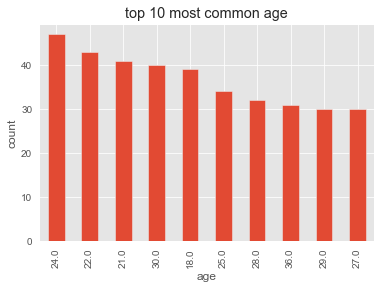

In [431]:
ax = df['Age'].value_counts().head(10).plot(kind= 'bar', title= 'top 10 most common age')
ax.set_xlabel('age')
ax.set_ylabel('count')
plt.show()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


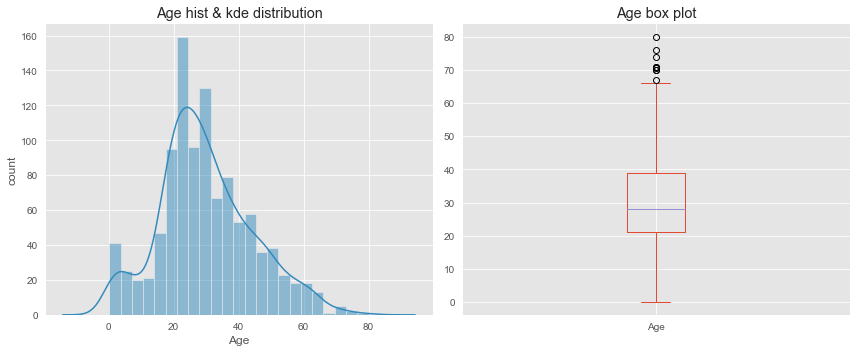

In [432]:
print(df['Age'].dropna().describe())

plot_numeric(df,'Age')


In [433]:
#precent of missing values in age
print('% of missing values: ',df['Age'].isnull().sum()/len(df['Age'])*100)


% of missing values:  20.091673032849503


summery:
1. age has 20% missing values.
2. distribution appears to be normal with mu = 29.88, sig = 14.41
3. from the box plot we notice that there are some outliers in the data (ages 70-80)

In [434]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Fare

fare is the amount of money paid per ticket, from wikipedia: 
Fares varied depending on class and season. Third Class fares from London, Southampton,
Queenstown cost £7.5s (equivalent to £800 today) while the cheapest First Class fares cost £23
(£2,400 today). The most expensive First Class suites were to have cost up to £870 in high
season (£92,000 today).

In [435]:
df['Fare'].head(10)


0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64

number of missing values for Fare: 1 

% of missing values for Fare: 0.07639419404125286 

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64


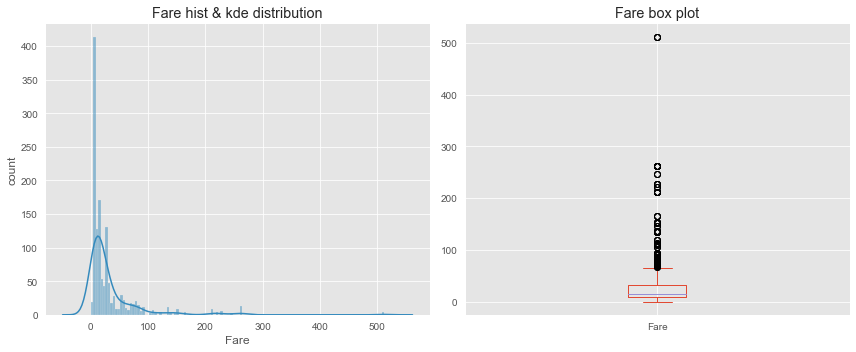

In [436]:
print('number of missing values for Fare:', df['Fare'].isna().sum() ,'\n')
print('% of missing values for Fare:', df['Fare'].isna().sum()/len(df['Fare'])*100 ,'\n')

print(df['Fare'].dropna().describe())

plot_numeric(df,'Fare')

In [437]:
print(df['Fare'].skew())

4.367709134122922


summery:
1. standard deviation is very high, skewness value of 4.367 suggests that the distribution has a substantial rightward tail. This might indicate that there are relatively few data points with very high values that are driving the average (mean) to be higher than the median
2. only 1 missing value

# Categorical Variables (Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch)

shallow look at the data we can see that some categories show clear information and some don't, let's split these into 2 separate arrays
1.  Cabin, Name, Ticket
2.  Survived, Sex, Pclass, Embarked, Sibsp, Parch
for the first set of features lets look at the basic grouping of each and for the other ill plot a graph to visualize the information


In [438]:
df[['Survived','Sex','Pclass','Embarked','Cabin','Name','Ticket','SibSp','Parch']].head(10)

,Survived,Sex,Pclass,Embarked,Cabin,Name,Ticket,SibSp,Parch
0,0.0,male,3,S,NaN,"Braund, Mr. Owen Harris",A/5 21171,1,0
1,1.0,female,1,C,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,1,0
2,1.0,female,3,S,NaN,"Heikkinen, Miss. Laina",STON/O2. 3101282,0,0
3,1.0,female,1,S,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,1,0
4,0.0,male,3,S,NaN,"Allen, Mr. William Henry",373450,0,0
5,0.0,male,3,Q,NaN,"Moran, Mr. James",330877,0,0
6,0.0,male,1,S,E46,"McCarthy, Mr. Timothy J",17463,0,0
7,0.0,male,3,S,NaN,"Palsson, Master. Gosta Leonard",349909,3,1
8,1.0,female,3,S,NaN,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",347742,0,2
9,1.0,female,2,C,NaN,"Nasser, Mrs. Nicholas (Adele Achem)",237736,1,0


In [439]:
print(df['Sex'].value_counts())

male      843
female    466
Name: Sex, dtype: int64


In [440]:
cat1= ['Cabin', 'Name', 'Ticket']
cat2= ['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']

def analyse_cat1 (df, feat):
    print('-------------Analysis of {} ----------\n'.format(feat))
    print('General Description of {}\n'.format(feat), df[feat].dropna().describe(), '\n')
    print('Number of Duplicates in {}\n'.format(feat), df[feat].duplicated().sum(), '\n')
    print('Value Counts in {}\n'.format(feat), df[feat].value_counts(), '\n')
    
def plot_cat2(df, feat):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle("Analysis of Feature: {}".format(feat), fontsize=16)

    
    # First subplot (bar)
    df[feat].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title("{} Value Counts (Bar)".format(feat))
    axes[0].set_xlabel("{}".format(feat))
    axes[0].set_ylabel("Count")
    
    # Second subplot (pie)
    df[feat].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
    axes[1].set_title("{} Value Counts (Pie)".format(feat))
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()
    
    print(df[feat].value_counts())

In [441]:
for f in cat1:
    analyse_cat1(df,f)

-------------Analysis of Cabin ----------

General Description of Cabin
 count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object 

Number of Duplicates in Cabin
 1122 

Value Counts in Cabin
 C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64 

-------------Analysis of Name ----------

General Description of Name
 count                     1309
unique                    1307
top       Connolly, Miss. Kate
freq                         2
Name: Name, dtype: object 

Number of Duplicates in Name
 2 

Value Counts in Name
 Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold The

Summery:
1. not a lot of info can be gathered from these feature, with some Feature Engineering we might be able to extract meaningfull data
2. cabin has many missing values, one possibility might be that the cabin was asinged to a single member of a family
3. names include titles might be a relevant feature to add 

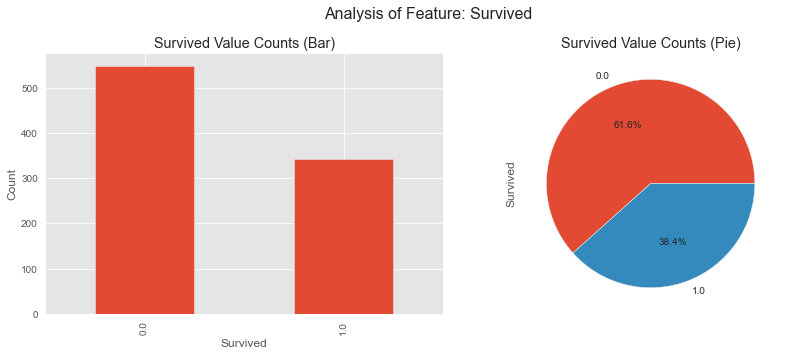

0.0    549
1.0    342
Name: Survived, dtype: int64


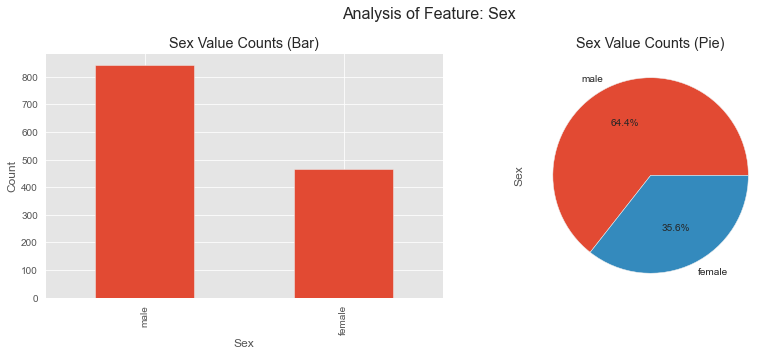

male      843
female    466
Name: Sex, dtype: int64


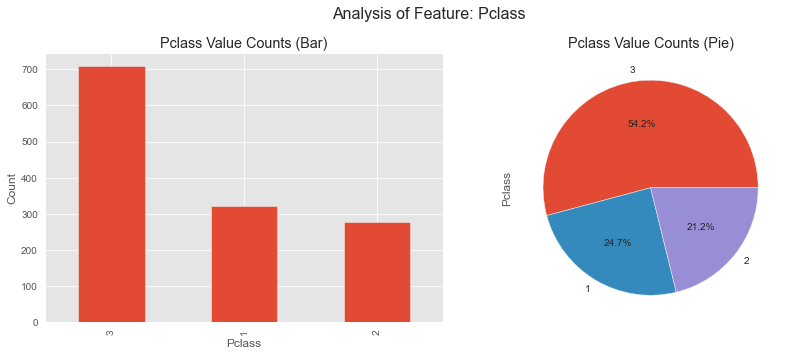

3    709
1    323
2    277
Name: Pclass, dtype: int64


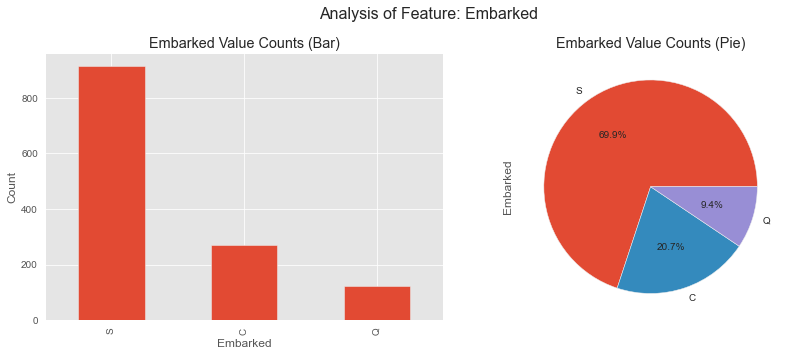

S    914
C    270
Q    123
Name: Embarked, dtype: int64


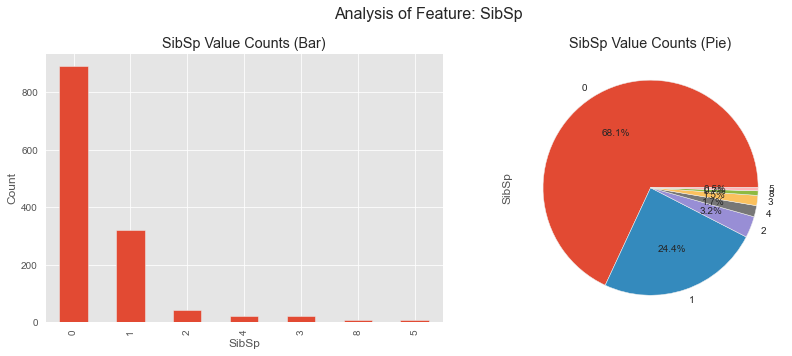

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


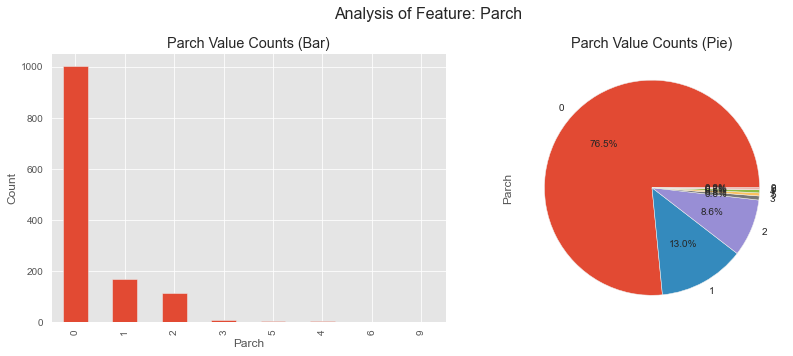

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


In [442]:
for f in cat2:
    plot_cat2(df,f)

Summery:
1. most passengers embarked in Southampton about 3/4 with Cherbourg and Queenstown about the same
2.  

# Basic Data Analysis

to get a better feeling of how the data relates to survival rate lets look at:
* Sex - Survived
* SibSp - Survived
* Parched - Survived
* Pclass - Survived

In [443]:
# sns.pairplot(data=df.reset_index(drop=True),hue='Survived')
# plt.show()

Sex and Survived:

In [444]:
df[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


Pclass and Survived:

In [445]:
df[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


SibSp and Survived:


In [446]:
df[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending=False)


,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Parch and Survived:

In [447]:
df[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


# Pre-Processing
dealing with outliers and filling missing values in the train data set

In [448]:
Q1 = np.nanpercentile(df['Age'],25)
Q3 = np.nanpercentile(df['Age'],75)
# calculate range:
IQR = Q3 - Q1
print(IQR)

18.0


# Outlier Detection

In [449]:
#fucntion to detect ourlier using Inter Quantile Range:
from collections import Counter
def detect_outliers(df, features):
    outlier_ind = []
    for f in features:
        # calculate Quartiles:
        Q1 = np.nanpercentile(df[f],25)
        Q3 = np.nanpercentile(df[f],75)

        # calculate range:
        IQR = Q3 - Q1

        #lower and upper bound
        step = IQR*1.5
        lower, upper = Q1 - step, Q3 + step

        # add ind to list
        col_list = df[(df[f] < lower) | (df[f] > upper)].index
        outlier_ind.extend(col_list)

    # remove dup

    outlier_ind = Counter(outlier_ind)
    multiple_outliers = list(i for i, v in outlier_ind.items() if v > 2)
    
    return multiple_outliers      

In [450]:
outlier_list = detect_outliers(df_train,["Age","SibSp","Parch","Fare"])
df_train.loc[outlier_list]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [451]:
df_train = df_train.drop(outlier_list, axis = 0).reset_index(drop=True)

# Missing Values

inorder to fill missing values lets look at the correlation between different features:

In [452]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [453]:
df.columns[df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [454]:
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

Embarked has 2 missing values and Fare has 1, lets start by taking care of these:  

In [455]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


 - inorder to fill the Embarked values ill try to understand the missing data based on the given data, we can assume that based on the fact the SibSp and Parch are equal to zero they had no family on board the titanic, plus the Pclass is 1 for both lets look at the relationship of between the price of the ticket (Fare), Pclass of one and other Embarked option. 

In [456]:
df[(df['SibSp'] == 0) & (df['Parch'] == 0) & (df['Pclass'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1.0,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
30,31,0.0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
55,56,1.0,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
378,1270,NaN,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S
390,1282,NaN,1,"Payne, Mr. Vivian Ponsonby",male,23.0,0,0,12749,93.5000,B24,S
400,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
403,1295,NaN,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S


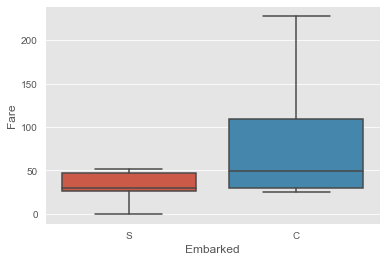

In [457]:
sns.boxplot(data= df[(df['SibSp'] == 0) & (df['Parch'] == 0) & (df['Pclass'] == 1)], x='Embarked', y='Fare', showfliers=False)
plt.show()

- since the Fare of both the samples is 80, C is the best option to fill the data

In [458]:
df['Embarked'] = df['Embarked'].fillna('C')
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [459]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


we see that similarly to the embarked we know the Pclass of the sample and that he has no family on board, ill fill the missing value as the Fare mean of similar samples   

In [460]:
mean_val = df[(df['SibSp'] == 0) & (df['Parch'] == 0) & (df['Pclass'] == 3)]['Fare'].mean()
print(mean_val)

9.09670721868366


In [461]:
df['Fare'] = df['Fare'].fillna(mean_val)
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


filling in missing values for age:

In [462]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Age - Sex
- sex does not seem to be informative feature of age, distributions appear to be the same

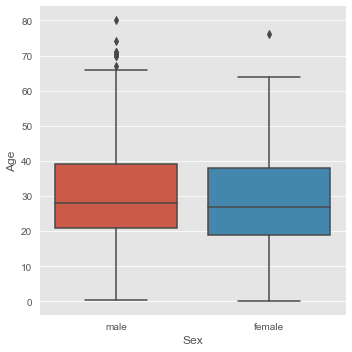

In [463]:
sns.catplot(x = 'Sex', y='Age', data =df, kind='box')
plt.show()

Age-Sex-Pclass
-   first class passengers are older than second with are older than third class

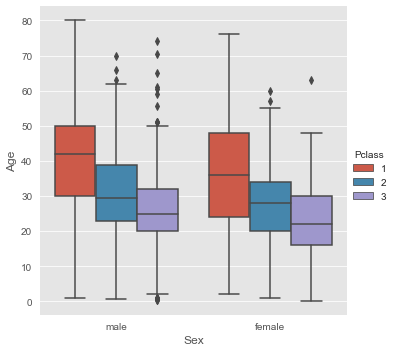

In [464]:
sns.catplot(x = 'Sex', y='Age', hue='Pclass', data =df, kind='box')
plt.show()

Parch and SibSp - Age
- parch and SibSp seem informative for age, distinct distribution between the different values 

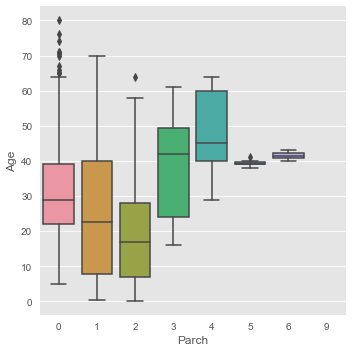

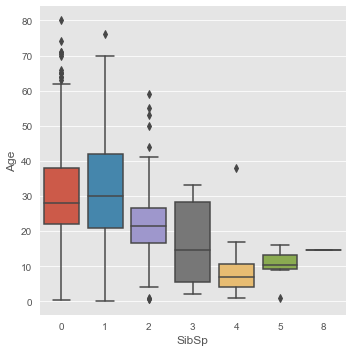

In [465]:
sns.catplot(x = 'Parch', y='Age', data =df, kind='box')
sns.catplot(x = 'SibSp', y='Age', data =df, kind='box')
plt.show()

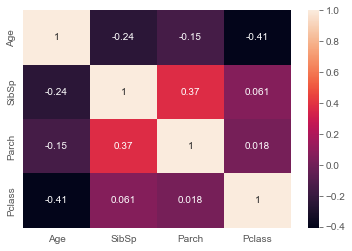

In [466]:
sns.heatmap(df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

to fill the Age feature ill find the median of samples with equal SibSP, Parch and Pclass 

In [467]:
missing_age = df['Age'][df['Age'].isnull()].index

for i in missing_age:
    pred_age = df['Age'][((df['SibSp'] == df.iloc[i]['SibSp']) &  (df['Parch'] == df.iloc[i]['Parch']) & (df['Pclass'] == df.iloc[i]['Pclass']))].median()
    age_med = df['Age'].median()
    df.loc[i, 'Age'] = pred_age if not np.isnan(pred_age) else age_med


In [468]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# visualization:

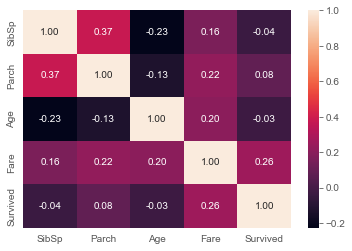

In [469]:
feature_list = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(df[feature_list].corr(), annot=True, fmt= ".2f")
plt.show()

- Fare seems to have high corr with survived at 0.26.

# Parch - Survived and SibSp - Survived

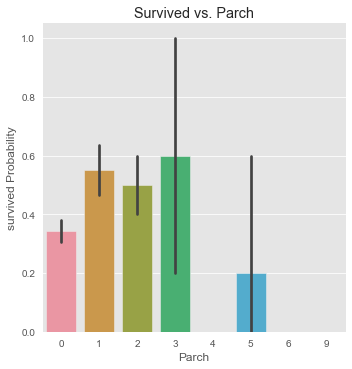

In [470]:
sns.catplot(x='Parch', y='Survived', data=df, kind='bar')
plt.title('Survived vs. Parch')
plt.ylabel('survived Probability')
plt.show()

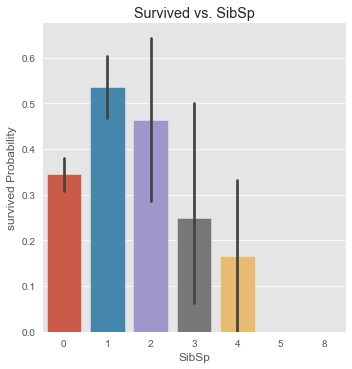

In [471]:
sns.catplot(x='SibSp', y='Survived', data=df, kind='bar')
plt.title('Survived vs. SibSp')
plt.ylabel('survived Probability')
plt.show()

- smaller families have a higher survival rate ( <= 3)
- 3 appears to be the TH for both

# Pclass - Survived

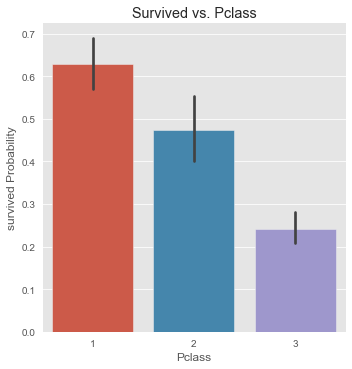

In [472]:
sns.catplot(x='Pclass', y='Survived', data=df, kind='bar')
plt.title('Survived vs. Pclass')
plt.ylabel('survived Probability')
plt.show()

- the better the class the higher the survival rate is

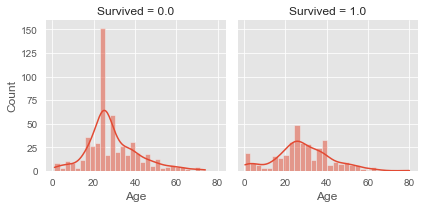

In [473]:
fig = sns.FacetGrid(df, col= 'Survived')
fig.map(sns.histplot, 'Age', bins=30, kde=True)
plt.show()

- most passengers are in the 15-35 range
- large number of people in their 20's did not survive

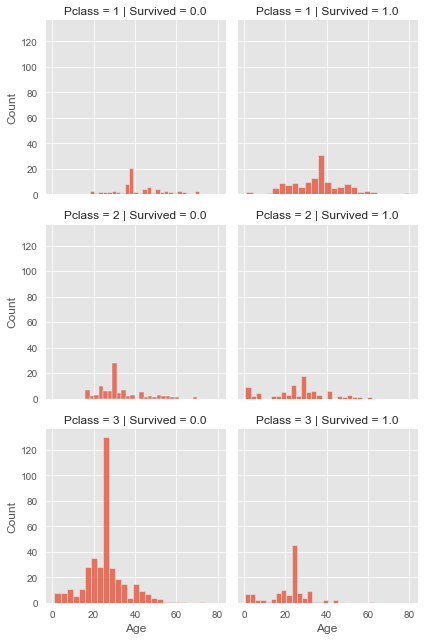

In [474]:
fig = sns.FacetGrid(df, col='Survived', row='Pclass')
fig.map(sns.histplot, 'Age', bins=25)
plt.show()

- surviving passengers form class 3 are mostly young adults
- much higher survival rate in age over 35 in class 1 then other classes

# Embarked - Sex - Pclass - Survived 

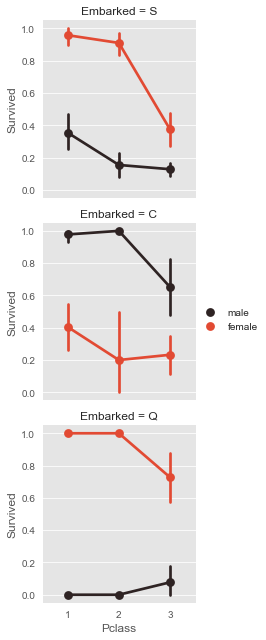

In [475]:
fig = sns.FacetGrid(df, row='Embarked')
fig.map(sns.pointplot, 'Pclass', 'Survived','Sex',order=None, hue_order=None)
fig.add_legend()
plt.show()

- females have a much higher survival rate
- males in Embarked = C have the highest survival rate
- males in class 3 have the highest survival rate in C

# Embarked - Sex - Fare - Survived 

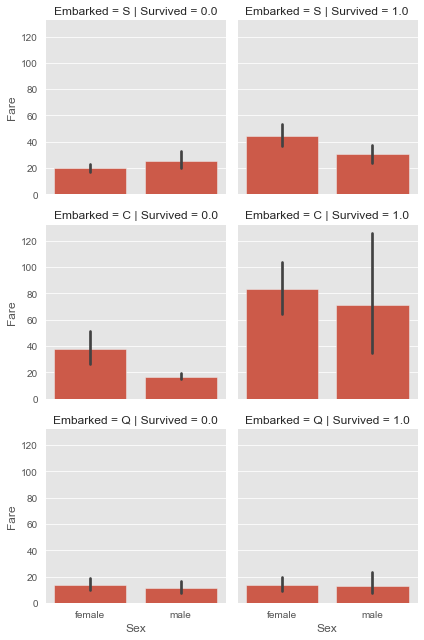

In [476]:
fig = sns.FacetGrid(df, row='Embarked', col='Survived')
fig.map(sns.barplot, 'Sex','Fare', order=None)
plt.show()

- Passengers who pay higher fare have better survival

# Summery
- Consider new feature for both Parch and SibSp (family size for example)
- Use Age feature in training
- Use Pclass in training
- Use Embaked and Sex in training
- Use Fare in training maybe as categorical feature    

# feature engineering
- new features
- one hot encoding

# Name -> Title

In [477]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [478]:
name = df['Name']
df['Title'] = [i.split(".")[0].split(',')[-1].strip() for i in name]

In [479]:
df['Title'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

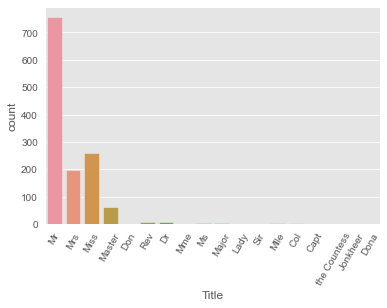

In [480]:
sns.countplot(x='Title', data= df)
plt.xticks(rotation=60)
plt.show()

In [481]:
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


mlle = miss in france

In [482]:
df['Title'] = df['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Major', 'Lady',
 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona'], 'Other')

# turn into categorical values
df['Title'] = [0 if t == 'Master' else 1 if t == 'Miss' or t == 'Ms' or t == 'Mlle' or t == 'Mrs' else 2 if t == 'Mr' else 3 for t in df['Title']]
df['Title'].head(100)


0     2
1     1
2     1
3     1
4     2
     ..
95    2
96    2
97    2
98    1
99    2
Name: Title, Length: 100, dtype: int64

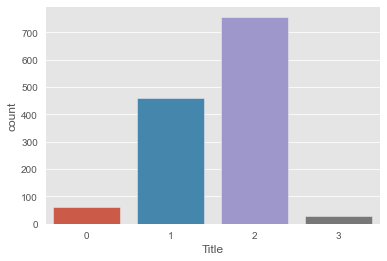

In [483]:
sns.countplot(x='Title', data = df)
plt.show()

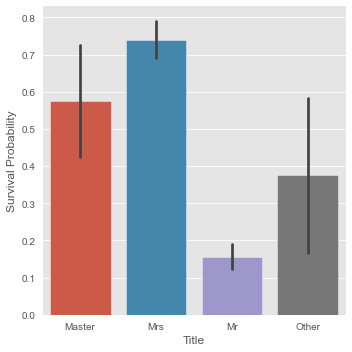

In [484]:
fig = sns.catplot(x = "Title", y = "Survived", data = df, kind = "bar")
fig.set_xticklabels(["Master","Mrs","Mr","Other"])
fig.set_ylabels("Survival Probability")
plt.show()

In [485]:
print(df[df['Title'] == 0]['Sex'].value_counts())

male    61
Name: Sex, dtype: int64


males with master title have a much higher probability of survival 

In [486]:
df.drop(labels=["Name"],axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Title'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


# Parch and SibSp -> Family size

In [487]:
df['Size'] = df['Parch'] + df['SibSp'] + 1
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Size
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


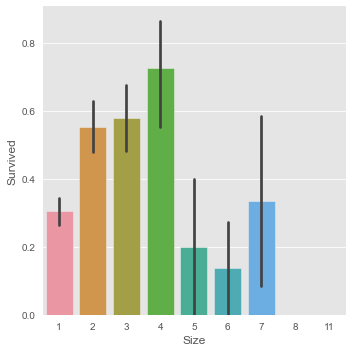

In [488]:
sns.catplot(x='Size',y='Survived', data=df, kind ='bar')
plt.show()

ill turn family size into a binary feature,
Thresh hold for family size should be 5.

In [489]:
df['Family_Size'] = [1 if i < 5 else 0 for i in df['Size']]
df.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Size,Family_Size
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.0,3,male,25.0,0,0,374910,8.0500,NaN,S,0,0,1,0,1,1
96,97,0.0,1,male,71.0,0,0,PC 17754,34.6542,A5,C,0,0,1,0,1,1
97,98,1.0,1,male,23.0,0,1,PC 17759,63.3583,D10 D12,C,0,0,1,0,2,1
98,99,1.0,2,female,34.0,0,1,231919,23.0000,NaN,S,0,1,0,0,2,1


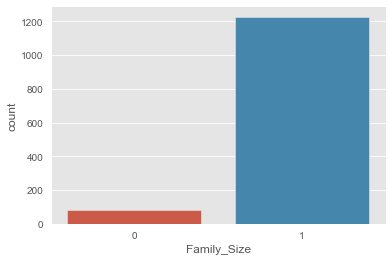

In [490]:
sns.countplot(x='Family_Size', data=df)
plt.show()

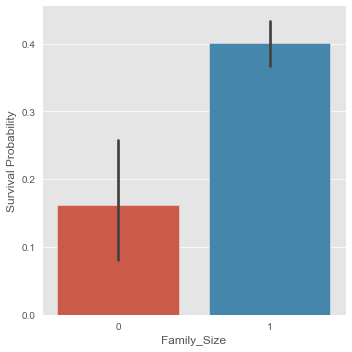

In [491]:
fig = sns.catplot(x="Family_Size", y="Survived", data=df, kind="bar")
fig.set_ylabels("Survival Probability")
plt.show()

survival probability is higher in smaller a family 

In [492]:
df.drop(labels=["Size"],axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Family_Size'])
df.head(100)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Family_Size_0,Family_Size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.0,3,male,25.0,0,0,374910,8.0500,NaN,S,0,0,1,0,0,1
96,97,0.0,1,male,71.0,0,0,PC 17754,34.6542,A5,C,0,0,1,0,0,1
97,98,1.0,1,male,23.0,0,1,PC 17759,63.3583,D10 D12,C,0,0,1,0,0,1
98,99,1.0,2,female,34.0,0,1,231919,23.0000,NaN,S,0,1,0,0,0,1


In [493]:
df = pd.get_dummies(df, columns=["Embarked"])
df['Pclass'] = df['Pclass'].astype('category')
df = pd.get_dummies(df, columns=["Pclass"])
df = pd.get_dummies(df, columns=["Sex"])
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Family_Size_0,Family_Size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,0,0,1,0,0,1,0,1
1,2,1.0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,0,1,1,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,1,0,0,1,0,0,1,1,0
3,4,1.0,35.0,1,0,113803,53.1000,C123,0,1,0,0,0,1,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,0,0,1,0,0,1,0,1
5,6,0.0,25.0,0,0,330877,8.4583,NaN,0,0,1,0,0,1,0,1,0,0,0,1,0,1
6,7,0.0,54.0,0,0,17463,51.8625,E46,0,0,1,0,0,1,0,0,1,1,0,0,0,1
7,8,0.0,2.0,3,1,349909,21.0750,NaN,1,0,0,0,1,0,0,0,1,0,0,1,0,1
8,9,1.0,27.0,0,2,347742,11.1333,NaN,0,1,0,0,0,1,0,0,1,0,0,1,1,0
9,10,1.0,14.0,1,0,237736,30.0708,NaN,0,1,0,0,0,1,1,0,0,0,1,0,1,0


dropping Cabin, Ticket and ID

In [494]:
df.drop(columns=['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [495]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Family_Size_0,Family_Size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1,0,0,1,0,1
1,1.0,38.0,1,0,71.2833,0,1,0,0,0,1,1,0,0,1,0,0,1,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,0,1,0,0,1,0,0,1,1,0
3,1.0,35.0,1,0,53.1000,0,1,0,0,0,1,0,0,1,1,0,0,1,0
4,0.0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1,0,0,1,0,1


# Model Selection

In [496]:
# importing useful tools for model selection

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Train-test split 

In [497]:
df_train_len

891

In [498]:
test = df[df_train_len:]
test.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Family_Size_0,Family_Size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,NaN,34.5,0,0,7.8292,0,0,1,0,0,1,0,1,0,0,0,1,0,1
1,NaN,47.0,1,0,7.0000,0,1,0,0,0,1,0,0,1,0,0,1,1,0
2,NaN,62.0,0,0,9.6875,0,0,1,0,0,1,0,1,0,0,1,0,0,1
3,NaN,27.0,0,0,8.6625,0,0,1,0,0,1,0,0,1,0,0,1,0,1
4,NaN,22.0,1,1,12.2875,0,1,0,0,0,1,0,0,1,0,0,1,1,0


In [499]:
test.drop(labels=['Survived'], axis = 1, inplace=True)

C:\Users\yotam\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [500]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Family_Size_0,Family_Size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,34.5,0,0,7.8292,0,0,1,0,0,1,0,1,0,0,0,1,0,1
1,47.0,1,0,7.0000,0,1,0,0,0,1,0,0,1,0,0,1,1,0
2,62.0,0,0,9.6875,0,0,1,0,0,1,0,1,0,0,1,0,0,1
3,27.0,0,0,8.6625,0,0,1,0,0,1,0,0,1,0,0,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,0,1,0,0,1,0,0,1,1,0


In [501]:
train = df[:df_train_len]
X_train_all = train.drop(labels=['Survived'], axis=1)
y_train_all = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, test_size=0.25, random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 668
X_test 223
y_train 668
y_test 223
test 418


# Logistic Regression- simple starting point

In [502]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
train_acc = round(model.score(X_train,y_train)*100,2)
test_acc = round(model.score(X_test,y_test)*100,2)
print("Train Accuracy: %{}".format(train_acc))
print("test Accuracy: %{}".format(test_acc))

Train Accuracy: %83.38
test Accuracy: %81.17


# Hyperparameter Tuning - Grid Search Cross Validation
- finding the best Hyperparameter for the ML models seletcted (Decision Tree, SVM, Random Forest, KNN, Logistic Regression) 

In [503]:
random_state = 42
classifiers = [DecisionTreeClassifier(random_state=random_state),
               SVC(random_state=random_state),
               RandomForestClassifier(random_state=random_state),
               LogisticRegression(random_state=random_state, max_iter=1000),
               KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {'kernel':['rbf'],
                 'gamma' : [0.001, 0.01, 0.1 ,1],
                 'C': [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [504]:
cv_res =[]
best_estimators = []
for i in range(len(classifiers)):
    clf = GridSearchCV(classifiers[i], param_grid=classifier_param[i], cv=StratifiedKFold(n_splits=10),scoring='accuracy',n_jobs=-1,verbose=1)
    clf.fit(X_train,y_train)
    cv_res.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_res[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.827928539122569
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8099502487562189
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8368837630031658
Fitting 10 folds for each of 14 candidates, totalling 140 fits


C:\Users\yotam\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.67516961        nan 0.79796472        nan 0.82189055
        nan 0.82937585        nan 0.82788331        nan 0.82937585
        nan 0.82937585]
  warnings.warn(


0.8293758480325645
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7874265038444144


In [505]:
cv_res

[0.827928539122569,
 0.8099502487562189,
 0.8368837630031658,
 0.8293758480325645,
 0.7874265038444144]

In [506]:
best_estimators

[DecisionTreeClassifier(max_depth=9, min_samples_split=30, random_state=42),
 SVC(C=50, gamma=0.001, random_state=42),
 RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                        min_samples_split=10, n_estimators=300, random_state=42),
 LogisticRegression(max_iter=1000, random_state=42),
 KNeighborsClassifier(metric='manhattan', n_neighbors=11)]

C:\Users\yotam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cross Validation Scores')

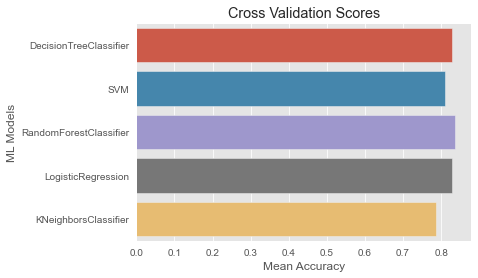

In [507]:
cv_res = pd.DataFrame({"Cross Validation Means":cv_res, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

plt = sns.barplot("Cross Validation Means", "ML Models", data = cv_res)
plt.set_xlabel("Mean Accuracy")
plt.set_title("Cross Validation Scores")

Ensemble modeling:

In [508]:
estimators = [("dt",best_estimators[0]),
              ("rfc",best_estimators[2]),
              ("lr",best_estimators[3])]

votingC = VotingClassifier(estimators = estimators, voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)

# Access the chosen estimators
chosen_estimators = votingC.estimators_

# Access the estimator names
estimator_names = [name for name, _ in estimators]

# Print the chosen estimators
for i, estimator in enumerate(chosen_estimators):
    print(f"Chosen Estimator {i}: {estimator_names[i]}")

print(accuracy_score(votingC.predict(X_test),y_test))

Chosen Estimator 0: dt
Chosen Estimator 1: rfc
Chosen Estimator 2: lr
0.8430493273542601


# Chosen Classifier
can conclude that the best Classifier was the ensemble model with accuracy of %84.3 on the test data set

In [509]:
votingC = votingC.fit(X_train_all, y_train_all)
test_pred = pd.Series(votingC.predict(test), name= 'Survived').astype(int)
results = pd.concat([test_PassengerId, test_pred],axis=1)
results.to_csv('C:/Users/yotam/PycharmProjects/pythonProject2/kaggle competitions/titanic/results.csv', index= False)